<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/%20ML%20with%20Python/oneleague_w14_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Reinforcement Learning



This assignment focuses on the area of **Reinforcement Learning**.  In this assignment, we aim to encapsulate the ideas from the lectures into code, and investigate some basic premade environments from OpenAI's gym.  We aim to investigate both policy and value oriented approaches to solving RL problems.  

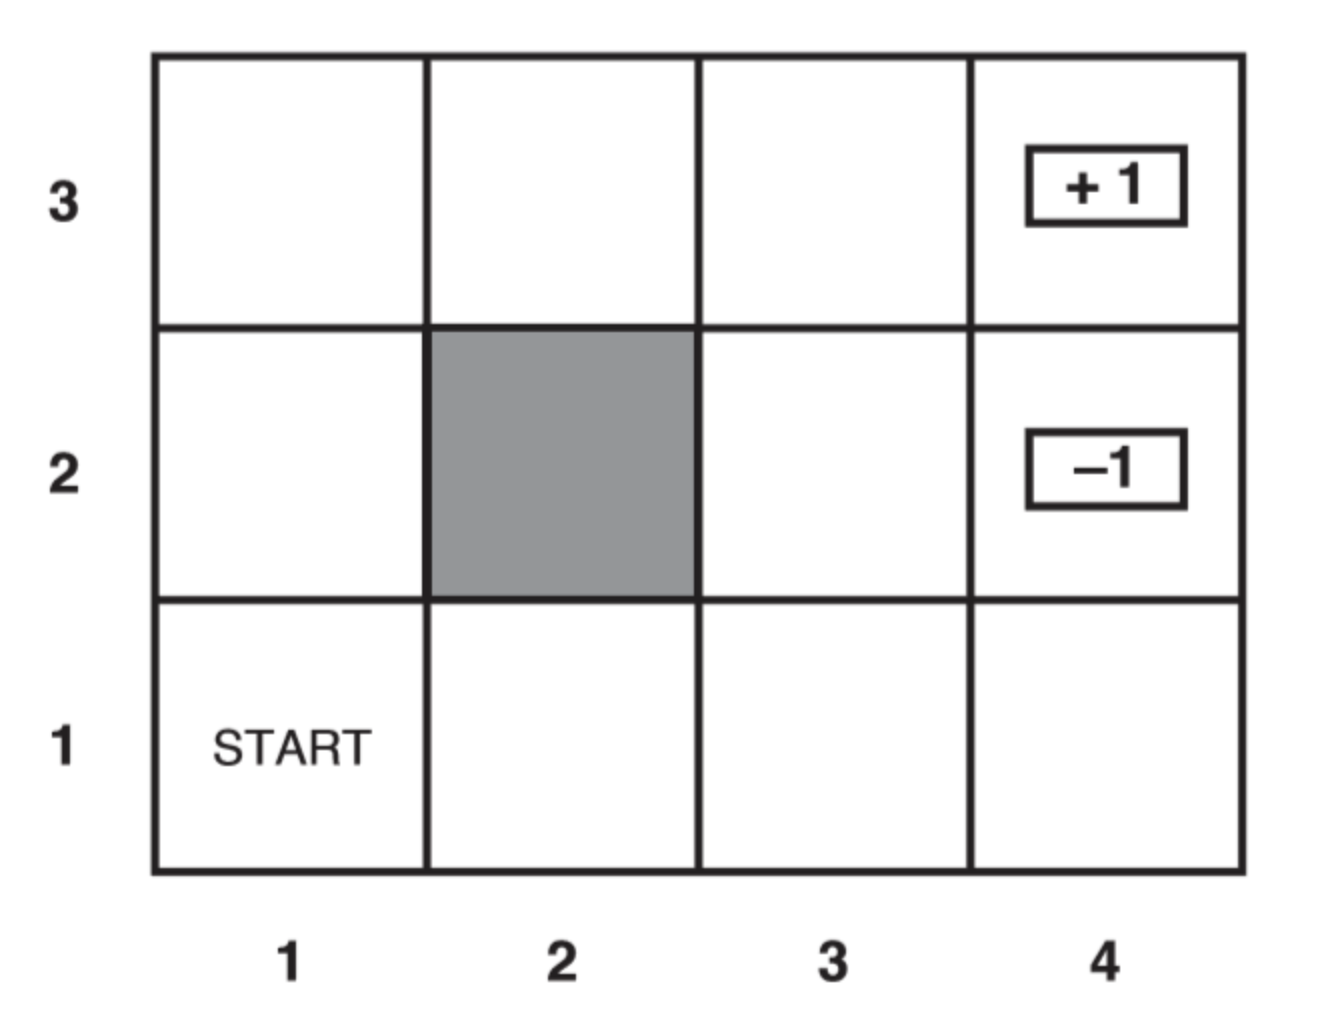

The intended outcome occurs with probability 0.8, and with probability .2 the agent moves at right angles to the intended direction.  Collision with wall results in no movement.  The two terminal stats have reward +1 and -1 respectively and all others -0.04.

$$U(s) = R(s) + \gamma \max_{a \in A(s)} \sum_{s'}P(s' | s,a)U(s')$$

Utility for $(1, 1)$?

In [2]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 38.1 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gymnasium as gym

### Example MDP

Consider the dummy MDP below. We have integer states, and the ability to go 'up' or 'down'. If we go 'up', we have an 80% chance to increase the state (up to 5), a 10% chance to stay the same, and a 10% chance to decrease the state. If we go 'down', we have the reverse probabilities. Our reward does not yet depend on the action.

In [10]:
S = {1, 2, 3, 4, 5}
A = {'up', 'down'}
def T(s, a):
    # Notice the min and max are there to keep from going above 5 or below 1
    if a == 'up': return [(.8, min(5, s+1)), (.1, s), (.1, max(1, s-1))]
    elif a == 'down': return [(.1, min(5, s+1)), (.1, s), (.8, max(1, s-1))]
    else: raise Exception(f"Invalid action {a}")
def R(s, a):
    if s == 3: return 1
    if s == 2 or s == 4: return -1
    if s == 1 or s == 5: return 3

dummyMDP = (S, A, T, R)

1. What is the probability of ending in state 1 when going 'down' from state 1?
2. If a random action is taken from the state $4$, what is the probability the resulting state is $4$? What is the immediate reward?

The ```ValueIteration``` function takes the 4-tuple ```S, A, T, R``` of the MDP, as well as a discount factor ```gamma```, and a number of iterations ```n_iter``` to run before returning. It returns *two* dictionaries `V` and `P`. `V` is the mapping of states to values, and `P` is a mapping of states to actions which represents the optimal policy to follow given these state valuations. 

To get `V`, you should run Value Iteration on the provided MDP for `n_iter` iterations. To get `P`, you should perform policy extraction on this `V` using the same gamma.

Complete the function `ValueIteration` below. If you find it easier to abandon the skeleton code, feel free. Recall the Bellman Update is as follows: $V(s) = \max_a [R(s, a) + \gamma\sum_{s'}P(s,a,s')V(s')]$

In [13]:
def ValueIteration(S, A, T, R, gamma, n_iter):
    
    # Value Iteration

    # Initialize the value dictionary to all 0's
    V = {s:0 for s in S}

    def value(s,a):
      return R(s,a) + gamma*sum(p*V[ns] for p, ns in T(s,a))

    # Iterate n_iter times...
    for _ in range(n_iter):
        # Copy the values as to not overwrite during each iteration
        V_prev = V.copy() 

        # For every state in S...
        for s in S:

            # TODO Update V[s] to the new best value based on the Bellman updade
            # Hint: remember to get the other state values from V_prev
            # Hint: this could take a few lines
            V[s] = max(value(s,a) for  a in A)
            

    # Policy Extraction
    
    # Initialize the empty policy
    P = {}

    # For every state in S...
    for s in S:
        # TODO set P[s] to be the optimal action to take from s according to V
        # Hint: part of should be similar to your previous code
        P = {s : max(A, key=lambda a: value(s, a)) for s in S}

    return V, P

In [14]:
V, P = ValueIteration(*dummyMDP, .9, 100)

# for s in dummyMDP[0]:
#     print(f'V[{s}] = {V[s]:.02f},    P[{s}] = {P[s]}')

V

{1: 25.932090873196685,
 2: 21.412475624310467,
 3: 20.15835324799441,
 4: 21.41248174212552,
 5: 25.932120807126818}

In [15]:
P

{1: 'down', 2: 'down', 3: 'up', 4: 'up', 5: 'up'}

### Example 2

### Problem 1: Reinforcement Learning vs. Machine Learning



In [ ]:

## WHICH OF THE FOLLOWING CHOICES ARE CHARACTERISTICS 
## OF REINFORCEMENT LEARNING PROBLEMS?  SELECT ALL THAT APPLY
## AND CONSTRUCT YOUR SOLUTIONS AS A LIST OF STRINGS
# a) There are known labels on all observations
# b) Data is sequential 
# c) We are working with iid data
# d) Delayed feedback after actions
ans_1 = ''


### Problem 2: Markov Property



In [ ]:

## Which of the following is an accurate interpretation
## of the Markov property?  Enter your solution as a string
## and bind this to ans_2 below.
# a) 'The more history we know the better'
# b) 'The past has no effect on the future'
# c) 'The future is independent of the past given the present'
# d) 'Actions are associated with time and discounted rewards'
ans_2 = ''

## A Basic Example

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/BlackJack6.jpg/500px-BlackJack6.jpg)

The example below demonstrates a basic Reinforcement Learning problem using **OpenAI**'s gym.  Here, we replicate a game of blackjack where our actions are either to take hit or stay.  The rules of blackjack are simple:



- Get 21 points on the player's first two cards (called a "blackjack" or "natural"), without a dealer blackjack;
- Reach a final score higher than the dealer without exceeding 21; or
- Let the dealer draw additional cards until their hand exceeds 21 ("busted").

Here, we will start a new game and explore some different strategies for when to take a card and when to hold and when to hit.  Below is a description of the environment from the documentation [here](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py).

```
Blackjack is a card game where the goal is to obtain cards that sum to as
near as possible to 21 without going over.  They're playing against a fixed
dealer.  Face cards (Jack, Queen, King) have point value 10.
Aces can either count as 11 or 1, and it's called 'usable' at 11.
This game is placed with an infinite deck (or with replacement).
The game starts with each (player and dealer) having one face up and one
face down card.  The player can request additional cards (hit=1) until they decide to stop
(stick=0) or exceed 21 (bust).  After the player sticks, the dealer reveals their facedown card, and draws
until their sum is 17 or greater.  If the dealer goes bust the player wins.
If neither player nor dealer busts, the outcome (win, lose, draw) is
decided by whose sum is closer to 21.  The reward for winning is +1,
drawing is 0, and losing is -1.  The observation of a 3-tuple of: the players current sum,
the dealer's one showing card (1-10 where 1 is ace),
and whether or not the player holds a usable ace (0 or 1).
```

In [16]:
env = gym.make('Blackjack-v1') #create a new game environment

In [17]:
#start a new game. tuple returned is of form
#(player hand, dealer hand, usable ace)
env.reset()

((10, 10, 0), {})

In [18]:
#take another card (Hit)
#now values are given as
#((player hand, dealer hand, usable ace), reward, game over, info)
env.step(1)

((15, 10, 0), 0.0, False, False, {})

In [19]:
#hold 
env.step(0)

((15, 10, 0), -1.0, True, False, {})

### Problem 3: Policy Hit below 18

Now, we construct our first policy for the **Blackjack** environment.  We will take action 1 if our hand is below 18 and otherwise stay.  We define a function that will take in an observation tuple `(player hand, dealer hand, usable ace)` and return 1 or 0 depending.

In [22]:

###Complete the function hit_under_18 below.
def hit_under_18(obs):
    ''' 
    This function takes in an observation from the enviornment
    and hits whenever a hand is under 18.
    
    
    Parameters
    ----------
    obs: Tuple of the form (player hand, dealer hand, usable ace)
    
    Returns
    -------
    1 or 0 depending on whether player hand is > 18
    
    Examples:
    ---------
    obs1 = (14, 10, False)
    hit_under_18(obs1) ====> 1
    
    obs = (19, 8, True) 
    hit_under_18(obs2) ====> 0
    '''

    p_hand, d_hand, u_ace = obs

    return 1 if p_hand < 18 else 0

In [24]:
hit_under_18((19,8,True))

0

### Problem 4: Simulating Plays

Now that we have a policy, we will explore how it performs over a number of games. Below, we construct a function that accepts a number of episodes and returns the results of simulating that many play iterations.  This function will loop over the given number of iterations, check the status of the game and implement our `hit_under_18` policy.  We want to pursue each strategy for 10 plays in each game to assure we come to completion.

In [35]:

## Complete the function simulate_play below.  
def simulate_play(plays, policy):
    '''
    This function takes in a number of plays and a policy.
    We return the average reward based on the plays.
    
    
    Parameters
    -----------
    plays: Number of iterations to simulate play based on.
    policy: Policy function to implement decisions
    
    Returns
    -------
    avg: average reward over episodic play
    
    
    Examples:
    ---------
    plays = 500
    policy = hit_under_18
    print(simulate_plays(5000, hit_under_18)) =====> 
    '''
    rewards =[]

    for episode in range(plays):
      episode_reward = 0
      obs = env.reset()
      game_over = False
      while not game_over:
        action = policy(obs[0])
        observation, reward, game_over, _, _ = env.step(action)
        episode_reward += reward
      rewards.append(episode_reward)
    
    return np.mean(rewards)

In [42]:
simulate_play(10, hit_under_18)

-0.7

### Problem 5: Comparing different policy

Now, we want to compare our policy of hitting under 18 to the more conservative hitting under 16 strategy.  Here, we need to define a new strategy, simulate plays for both, and determine which of our policies is better.  After doing so, you are to answer the questions below.

In [ ]:

## Using your simulate_play function, you are 
## to explore which policy seems better based on 
## higher average rewards.  
## Which policy was more successful:
# a) Hitting under 18
# b) Hitting under 16
# c) Neither
# d) They are roughly the same
ans_5 = ''

### Representing an MDP

Now, we move to a different problem.  Using the example graph we aim to represent the key components of the Markov Decision Process.  In the image below, we've adjusted our diagram to represent each individual action $a_0(\text{move slow}), a_1(\text{move fast})$ and their respective probabilities from the given state. We will begin by representing this problem and later apply  

- *P*: Transition probability matrix of the form $P(s, a, s')$.
- *R*: Reward matrix of the form $R(s, a, s')$.
- *$\gamma$*:  Discount rate




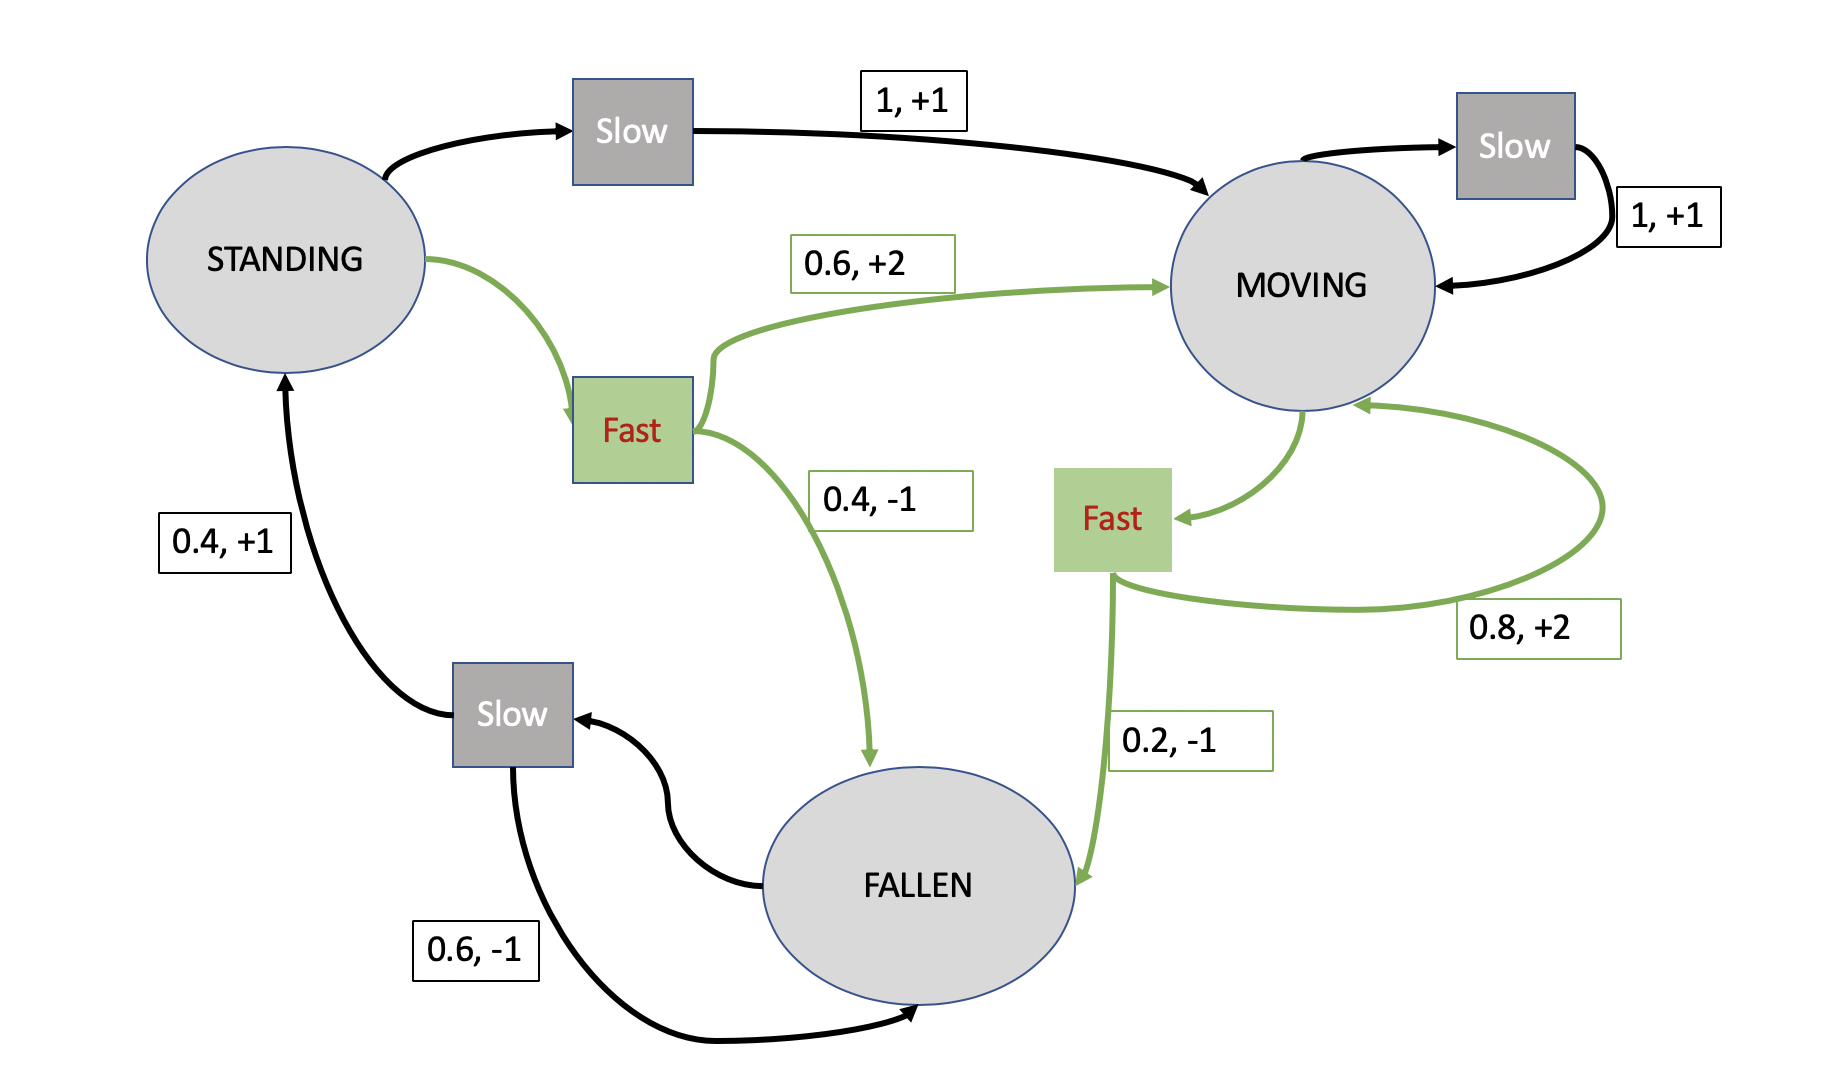

### Problem 6: Transition Probability Matrix

Here, we want to capture all the information of states and transitions in the image above.  We want to define $P$ as an $S \times a \times S$ matrix, in order of **standing, fallen, moving**.  The elements of the matrix are the probabilities of state trainsitions from depending on each action.  In our example we would have a $3 \times 2 \times 3$ matrix.  In the case of impossible actions we represent this with `np.nan`.  We orient the matrix as follows:

| $~~~~~~~~~~~~~~~~~~~~~~~~$           | a_0       $~~~~~~~~~~~~~~~~$    | a_1  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$        | 
| ------------- | ------------- | ------------ | 
| **S** |  $$[P_S,P_F,P_M]$$ | $$[P_S,P_F,P_M]$$  |   
| **F** | $$[P_S,P_F,P_M]$$  |  $$[P_S,P_F,P_M]$$ |    
| **M** |  $$[P_S,P_F,P_M]$$  |  $$[P_S,P_F,P_M]$$  |   

where $a_0$ = walk slow and $a_1$ = walk fast.



In [45]:

## Using the diagram above represent the transition
## probability matrix.  This should be a 3 x 3 x 3 array,
## where np.nan is used to represent impossible actions.
P = np.array([[[0, 0, 1], [0, 0.4, 0.6]],
              [[0.4, 0.6, 0], [np.nan, np.nan, np.nan]],
              [[0, 0, 1], [0, 0.2, 0.8]]
              ])


### Problem 7: Reward Matrix

Now, we want to assemble our reward matrix.  This will be the same shape and orientation as our matrix $P$, but rather than transition probabilities the matrix will contain entries corresponding to the reward associated with each action. 

In [46]:

## Construct a reward matrix for the MDP above.
## In the case of an impossible action use np.nan's.

R = np.array([[[0, 0, 1], [0, -1, 2]],
              [[1, -1, 0], [np.nan, np.nan, np.nan]],
              [[0, 0, 1], [0, -1, 2]]
              ])



### Problem 8: Possible Actions


Finally, we use our diagram to determine the possible actions from each state. Recall, we have two action $a_0$(move slow) and $a_1$(move fast).  We will use a list structure to hold these and contain the same order of states as $P$ and $R$. 

In [47]:

## Create a list of possible actions
## in the order standing, fallen, moving.
## For example, the only possible action from
## fallen is to move slow.
possible_actions = [[0, 1], [0], [0, 1]]

### Q-Value Iteration

We saw in the lectures the idea of value-iteration and the similar approach using the *Q-Value Iteration Algorithm*.  Here, we keep track of how well our policy performs through the following formula:

$$Q_{k + 1}(s, a) \leftarrow \sum_{s'} P(s, a, s')[ R(s, a, s') + \gamma \max_{a'} Q_k(s', a')] \quad \forall (s, a)$$

We will use our matrices above to represent $P$ and $R$ and our possible actions to draw from.  The matrix $Q$ will be a $S \times A$ array initialized with 0 and $-\infty$ for possible and impossible actions respectively.  We track the $Q$-values associated with each state,action pair.  Below, we implement the *Q-Value Iteration* algorithm by first initializing our $Q$ array and subsequently implementing the algorithm to update $Q(s, a)$. 

### Problem 9: Q-Table

As stated above, our $Q$ table contains values related to each possible state, action pair.  We want this matrix to contain $-\infty$ where there are impossible actions, and the orientation is demonstrated below where rows are states and columns are actions:

$$Q-table: \begin{bmatrix}
(standing, slow) & (standing, fast) \\
(fallen, slow) & (fallen, fast) \\
(moving, slow) & (moving, fast \\
\end{bmatrix}$$

In [49]:

## Instantiate a Q-table to represent our problem.  
## Use an initial value of zero for any possibility
## and -np.inf for any impossible actions.
Q = np.zeros(3,2)
Q[1,1] = np.inf


TypeError: ignored

### Problem 10: Implementing Q-Value Iteration

Now we are ready to implement the algorithm repeated below.  To do so, we write a function that expects the key elements of the problem in addition to a **discount rate** and number of iterations.

$$Q_{k + 1}(s, a) \leftarrow \sum_{s'} P(s, a, s')[ R(s, a, s') + \gamma \max_{a'} Q_k(s', a')] \quad \forall (s, a)$$



In [ ]:

## Complete the q_value_iteration function below.
def q_value_iteration(Q, P, R, possible_actions, discount_rate, n_iter):
    '''
    This function implements a Q-value iteration and returns
    an updated Q-table.
    
    Parameters
    ----------
    Q: Q-value table initialized with zero values for possible
    actions and -np.inf for impossible actions
    
    P: Probability transition matrix
    
    R: Reward matrix
    
    possible_actions: List of possible actions 
    
    discount_rate: gamma in q-value iteration formula representing 
    discounting of past episodes
    
    n: number of iterations to run iterations
    
    Returns
    -------
    Q: Updated Q-table after n-iterations
    
    Examples
    --------
    q_value_iteration(Q, P, R, possible_actions, 0.9, 1) ---> 
    array([[ 1. ,  0.8],
       [-0.2,  nan],
       [ 1. ,  1.4]])
       
       
    q_value_iteration(Q, P, R, possible_actions, 0.1, 1000) --->
    '''
    pass

### Problem 11: Extracting Optimal Policy

Now that we have our Q-table, we can extract the optimal policy by examining each states rows and selecting the action with maximum Q-value.

In [ ]:

## Complete the function extract_policy below.
## The function expects a q-table and should return 
## the optimal state action pairs.
def extract_policy(q_table):
    '''
    This function takes in a q-value table
    and extracts the optimal action for each state.
    
    Parameters
    -----------
    q_table: State x Action matrix of q-values
    
    Returns
    -------
    policy: one-dimensional policy with optimal action for each 
    state
    
    Examples:
    ---------
    table_1 = q_value_iteration(Q, P, R, possible_actions, 0.9, 5000)
    table_2 = q_value_iteration(Q, P, R, possible_actions, 0.001, 5000)
    print(extract_policy(table_1)) ===> array([0, 0, 0])
    print(extract_policy(table_2)) ===> array([0, 0, 1])
    '''
    pass